In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [11]:
train_data1 = pd.read_csv(r'/home/cubid/code/tf17/ECG/archive/mitbih_train.csv',header=None)
train_data1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
test_data1 = pd.read_csv(r'/home/cubid/code/tf17/ECG/archive/mitbih_test.csv',header=None)
test_data1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train, y_train = train_data1.iloc[:, :-1].values, train_data1.iloc[:, -1].values
X_test, y_test = test_data1.iloc[:, :-1].values, test_data1.iloc[:, -1].values


/tmp/ipykernel_44002/872610165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


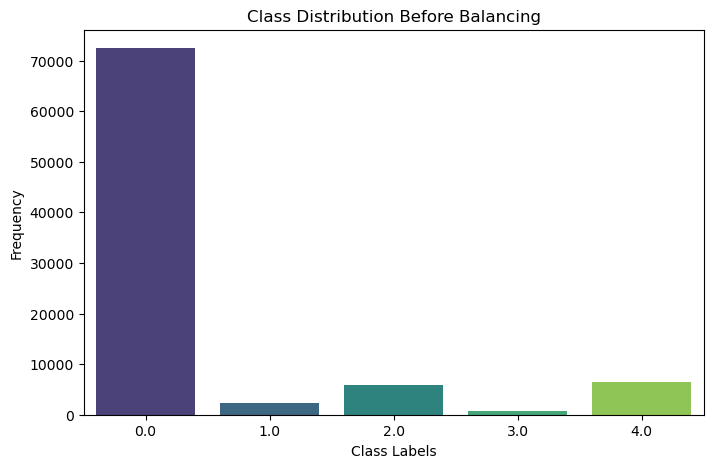

/tmp/ipykernel_44002/872610165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


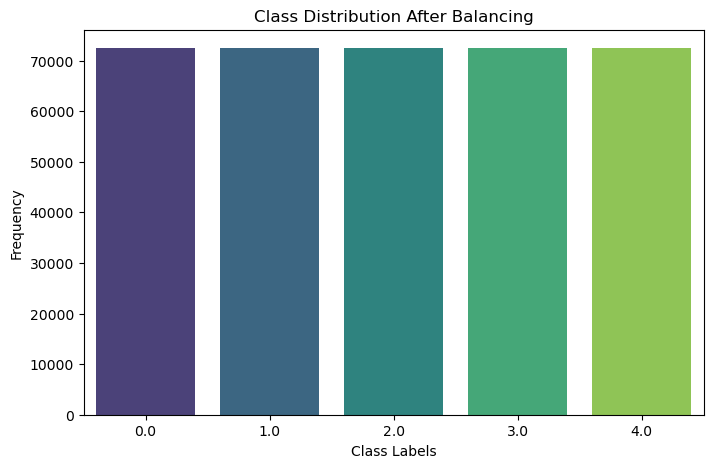

/tmp/ipykernel_44002/872610165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


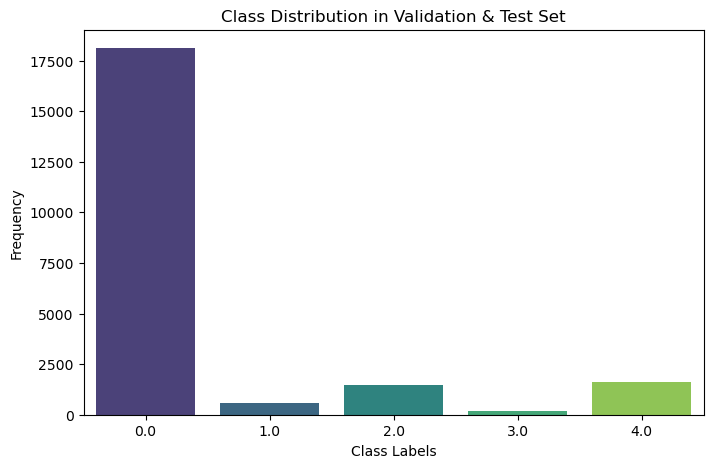

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm hiển thị tần suất các lớp
def plot_class_distribution(y, title):
    counter = Counter(y)
    classes = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(8, 5))
    sns.barplot(x=classes, y=counts, palette="viridis")
    plt.xlabel("Class Labels")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Tần suất từng lớp trong tập train trước khi cân bằng
plot_class_distribution(y_train, "Class Distribution Before Balancing")

# 🔄 **Cân bằng dữ liệu bằng Oversampling (SMOTE)**
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

# Reshape lại thành dạng (samples, timesteps, features)
X_train_bal = X_train_bal.reshape((X_train_bal.shape[0], 1, X_train_bal.shape[1]))

# Tần suất từng lớp sau khi cân bằng
plot_class_distribution(y_train_bal, "Class Distribution After Balancing")

# Tần suất từng lớp trong tập validation và test
plot_class_distribution(y_test, "Class Distribution in Validation & Test Set")


In [16]:
print(f"train data size: {train_data1.shape}")
print(f"test data size: {test_data1.shape}")

train data size: (87554, 188)
test data size: (21892, 188)


In [17]:
print(train_data1.isna().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [18]:
X_train = train_data1.iloc[:, :-1]  
y_train = train_data1.iloc[:, -1]   


In [19]:
print("Unique values in y:", y_train.unique())

Unique values in y: [0. 1. 2. 3. 4.]


In [20]:
X_test = test_data1.iloc[:, :-1]  
y_test = test_data1.iloc[:, -1]  

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(87554, 187)

In [23]:
X_test.shape

(21892, 187)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2

# Build the model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

/home/cubid/miniconda3/envs/tf17/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1740633267.256701   44002 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9706 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [25]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

In [27]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_test, y_test),  
                    callbacks=[lr_reduction, early_stopping],
                    verbose=1)


Epoch 1/30


I0000 00:00:1740633269.828432   44780 service.cc:148] XLA service 0x36602a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740633269.828486   44780 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-02-27 05:14:29.863699: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740633270.050095   44780 cuda_dnn.cc:529] Loaded cuDNN version 90300


 70/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4285 - loss: 2.0973

I0000 00:00:1740633271.928776   44780 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


685/685 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7870 - loss: 1.1565 - val_accuracy: 0.9527 - val_loss: 0.4759 - learning_rate: 0.0010
Epoch 2/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9410 - loss: 0.4889 - val_accuracy: 0.9602 - val_loss: 0.3340 - learning_rate: 0.0010
Epoch 3/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9482 - loss: 0.3604 - val_accuracy: 0.9621 - val_loss: 0.2760 - learning_rate: 0.0010
Epoch 4/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9538 - loss: 0.2951 - val_accuracy: 0.9643 - val_loss: 0.2355 - learning_rate: 0.0010
Epoch 5/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9546 - loss: 0.2671 - val_accuracy: 0.9657 - val_loss: 0.2159 - learning_rate: 0.0010
Epoch 6/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9579 - loss: 0.2423 - val_accuracy: 0.9664 - val_loss: 0.2049 - learning_rate: 0.0010
Epoch 7/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9584 - loss: 0.2347 - val_accurac

In [28]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.1170
Test Accuracy: 0.9783


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
📋 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9810    0.9966    0.9888     18118
         1.0     0.9378    0.6241    0.7495       556
         2.0     0.9617    0.9185    0.9396      1448
         3.0     0.7832    0.6914    0.7344       162
         4.0     0.9887    0.9776    0.9831      1608

    accuracy                         0.9783     21892
   macro avg     0.9305    0.8416    0.8791     21892
weighted avg     0.9778    0.9783    0.9771     21892



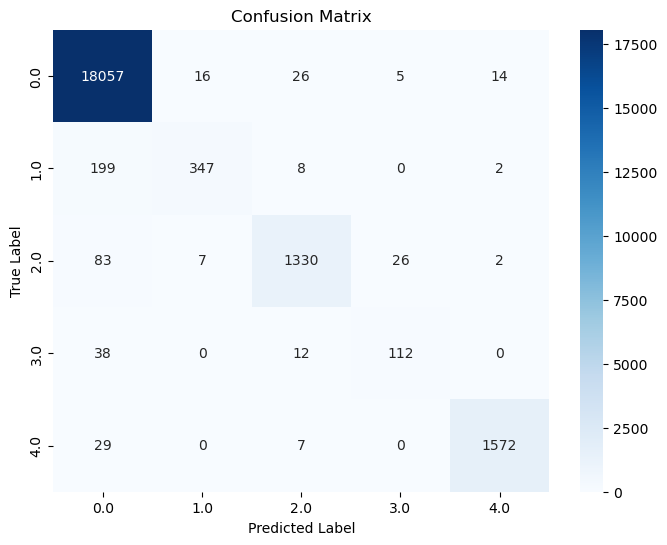

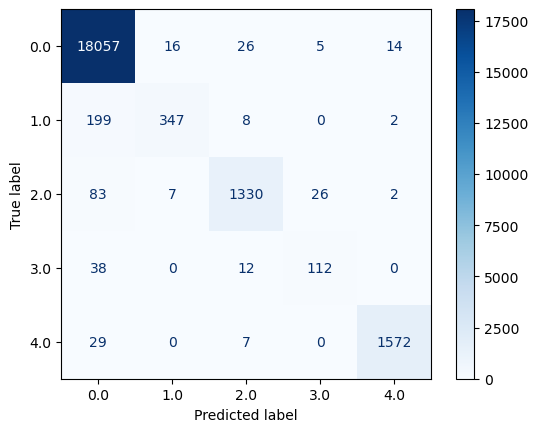

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🟢 **Dự đoán trên tập test**
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Chuyển sang nhãn dự đoán

# 📌 **Classification Report (Precision, Recall, F1-Score)**
print("📋 Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

# 📊 **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred_classes)
labels = sorted(np.unique(y_test))  # Lấy danh sách nhãn theo thứ tự

# 🔹 **Vẽ Confusion Matrix**
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🚀 **Hiển thị Confusion Matrix dưới dạng trực quan**
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.show()


In [30]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  

report = classification_report(y_test, y_pred)
print(report)


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18118
         1.0       0.94      0.62      0.75       556
         2.0       0.96      0.92      0.94      1448
         3.0       0.78      0.69      0.73       162
         4.0       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.84      0.88     21892
weighted avg       0.98      0.98      0.98     21892



# LSTM


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2

In [32]:
train_data1 = pd.read_csv('/home/cubid/code/tf17/ECG/archive/mitbih_train.csv', header=None)
test_data1 = pd.read_csv('/home/cubid/code/tf17/ECG/archive/mitbih_test.csv', header=None)


/tmp/ipykernel_44002/872610165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


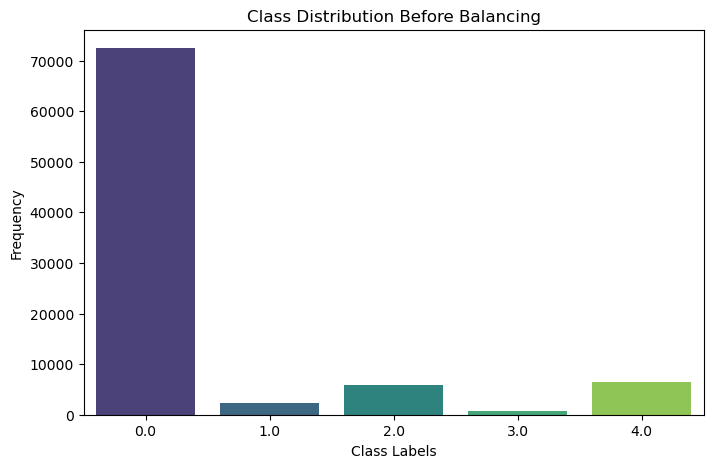

/tmp/ipykernel_44002/872610165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


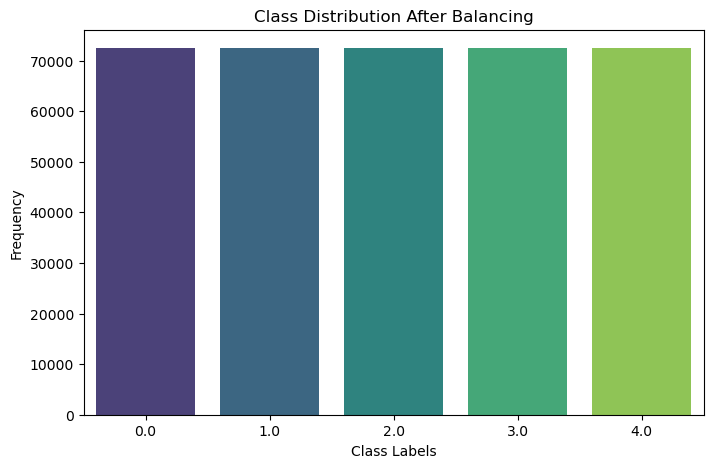

/tmp/ipykernel_44002/872610165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


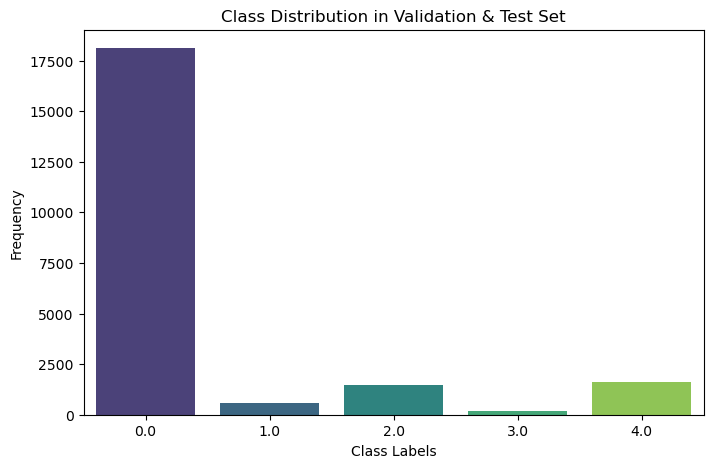

In [33]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm hiển thị tần suất các lớp
def plot_class_distribution(y, title):
    counter = Counter(y)
    classes = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(8, 5))
    sns.barplot(x=classes, y=counts, palette="viridis")
    plt.xlabel("Class Labels")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Tần suất từng lớp trong tập train trước khi cân bằng
plot_class_distribution(y_train, "Class Distribution Before Balancing")

# 🔄 **Cân bằng dữ liệu bằng Oversampling (SMOTE)**
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

# Reshape lại thành dạng (samples, timesteps, features)
X_train_bal = X_train_bal.reshape((X_train_bal.shape[0], 1, X_train_bal.shape[1]))

# Tần suất từng lớp sau khi cân bằng
plot_class_distribution(y_train_bal, "Class Distribution After Balancing")

# Tần suất từng lớp trong tập validation và test
plot_class_distribution(y_test, "Class Distribution in Validation & Test Set")


In [34]:
X_train = train_data1.iloc[:, :-1]  
y_train = train_data1.iloc[:, -1]   
X_test = test_data1.iloc[:, :-1]  
y_test = test_data1.iloc[:, -1]   

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape dữ liệu thành (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [35]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)


/home/cubid/miniconda3/envs/tf17/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(X_test, y_test),  
                    callbacks=[lr_reduction, early_stopping],
                    verbose=1)

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/25
685/685 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7675 - loss: 0.8229 - val_accuracy: 0.9512 - val_loss: 0.2102 - learning_rate: 0.0010
Epoch 2/25
685/685 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9451 - loss: 0.2499 - val_accuracy: 0.9614 - val_loss: 0.1594 - learning_rate: 0.0010
Epoch 3/25
685/685 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9525 - loss: 0.2028 - val_accuracy: 0.9671 - val_loss: 0.1333 - learning_rate: 0.0010
Epoch 4/25
685/685 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9604 - loss: 0.1648 - val_accuracy: 0.9679 - val_loss: 0.1260 - learning_rate: 0.0010
Epoch 5/25
685/685 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9634 - loss: 0.1449 - val_accuracy: 0.9734 - val_loss: 0.1087 - learning_rate: 0.0010
Epoch 6/25
685/685 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9648 - loss: 0.1367 - val_accuracy: 0.9741 - val_loss: 0.1013 - learning_rate: 0.0010
Epoch 7/25
685/685 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9695 - l

In [37]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Báo cáo kết quả
report = classification_report(y_test, y_pred_classes)
print(report)

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.88      0.72      0.79       556
         2.0       0.95      0.94      0.94      1448
         3.0       0.78      0.71      0.74       162
         4.0       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.87      0.89     21892
weighted avg       0.98      0.98      0.98     21892



685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📋 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9862    0.9943    0.9902     18118
         1.0     0.8830    0.7194    0.7929       556
         2.0     0.9516    0.9378    0.9447      1448
         3.0     0.7823    0.7099    0.7443       162
         4.0     0.9862    0.9801    0.9832      1608

    accuracy                         0.9804     21892
   macro avg     0.9179    0.8683    0.8911     21892
weighted avg     0.9798    0.9804    0.9799     21892



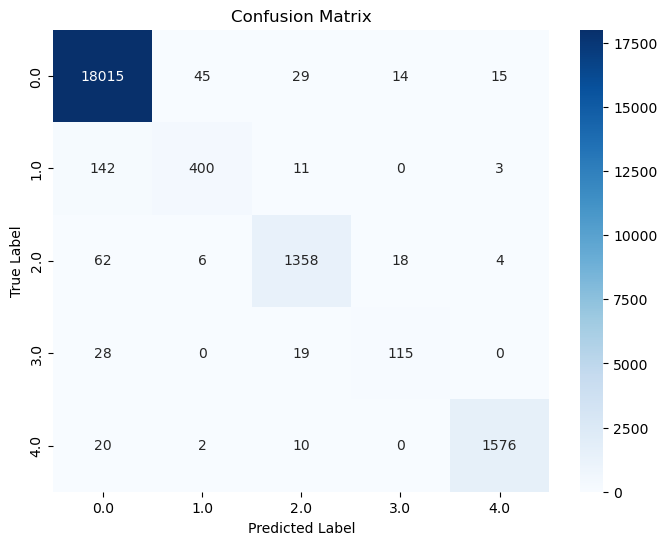

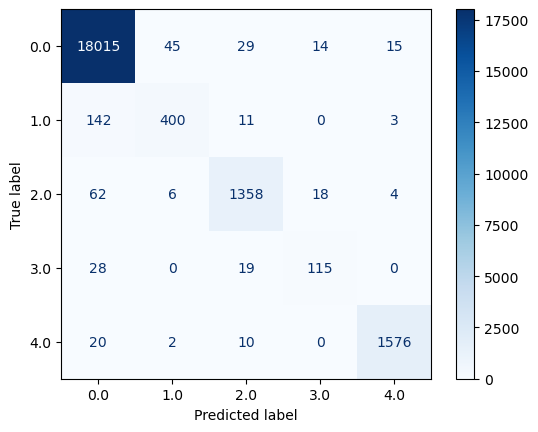

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🟢 **Dự đoán trên tập test**
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Chuyển sang nhãn dự đoán

# 📌 **Classification Report (Precision, Recall, F1-Score)**
print("📋 Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

# 📊 **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred_classes)
labels = sorted(np.unique(y_test))  # Lấy danh sách nhãn theo thứ tự

# 🔹 **Vẽ Confusion Matrix**
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🚀 **Hiển thị Confusion Matrix dưới dạng trực quan**
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.show()
